<a href="https://colab.research.google.com/github/khusboobharadwaj/Bharat_Intern_DS_Task2/blob/main/TitanicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
## The Data

In [ ]:
import os

In [ ]:
data_dir = '/content/drive/MyDrive/titanic'
for filename in os.listdir('/content/drive/MyDrive/titanic'):
   for filename in filename:
    print(os.path.join(data_dir, filename))

/content/drive/MyDrive/titanic/g
/content/drive/MyDrive/titanic/e
/content/drive/MyDrive/titanic/n
/content/drive/MyDrive/titanic/d
/content/drive/MyDrive/titanic/e
/content/drive/MyDrive/titanic/r
/content/drive/MyDrive/titanic/_
/content/drive/MyDrive/titanic/s
/content/drive/MyDrive/titanic/u
/content/drive/MyDrive/titanic/b
/content/drive/MyDrive/titanic/m
/content/drive/MyDrive/titanic/i
/content/drive/MyDrive/titanic/s
/content/drive/MyDrive/titanic/s
/content/drive/MyDrive/titanic/i
/content/drive/MyDrive/titanic/o
/content/drive/MyDrive/titanic/n
/content/drive/MyDrive/titanic/.
/content/drive/MyDrive/titanic/c
/content/drive/MyDrive/titanic/s
/content/drive/MyDrive/titanic/v
/content/drive/MyDrive/titanic/t
/content/drive/MyDrive/titanic/r
/content/drive/MyDrive/titanic/a
/content/drive/MyDrive/titanic/i
/content/drive/MyDrive/titanic/n
/content/drive/MyDrive/titanic/.
/content/drive/MyDrive/titanic/c
/content/drive/MyDrive/titanic/s
/content/drive/MyDrive/titanic/v
/content/d

In [ ]:
## Load Titanic Datset

In [ ]:
import pandas as pd

# Assuming your CSV file is named 'titanic.csv' and is located within the 'titanic' directory
train = pd.read_csv('/content/drive/MyDrive/titanic/train.csv')

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
## Display the first few rows of the dataset

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Check for missing values
print(train.isnull().sum())

# Fill missing values for 'Age' with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column if it exists
train.drop(columns=['Cabin'], inplace=True)




PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
## Verify that there are no more missing values
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
# Convert 'Sex' to numerical
if 'Sex' in train.columns:
    train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numerical using one-hot encoding
if 'Embarked' in train.columns:
    train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)


In [ ]:
## Exploratory Data Analysis

In [ ]:
# Summary statistics of the dataset
summary_stats = train.describe()
summary_stats


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
## Univariate Analysis

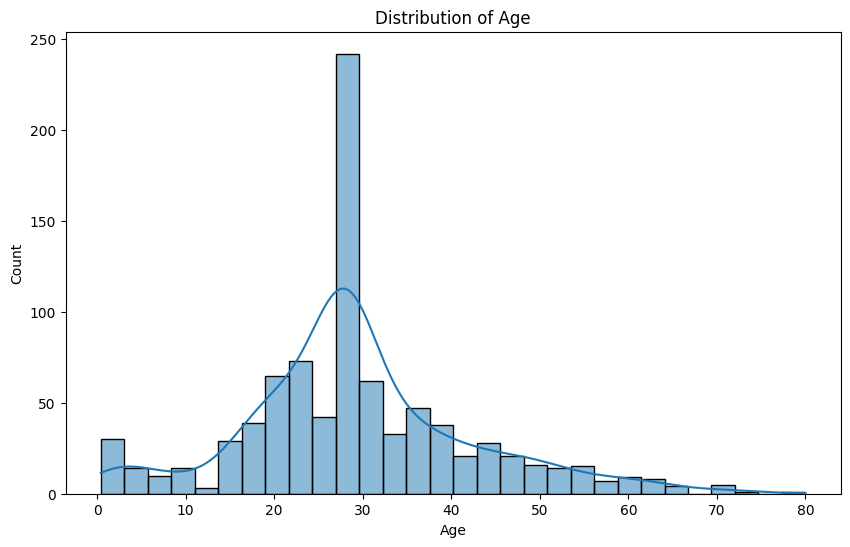

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Age
if 'Age' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train['Age'], kde=True)
    plt.title('Distribution of Age')
    plt.show()



<ipython-input-45-ecaac5c08772>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Survived', palette=['#1f77b4', '#ff7f0e'])


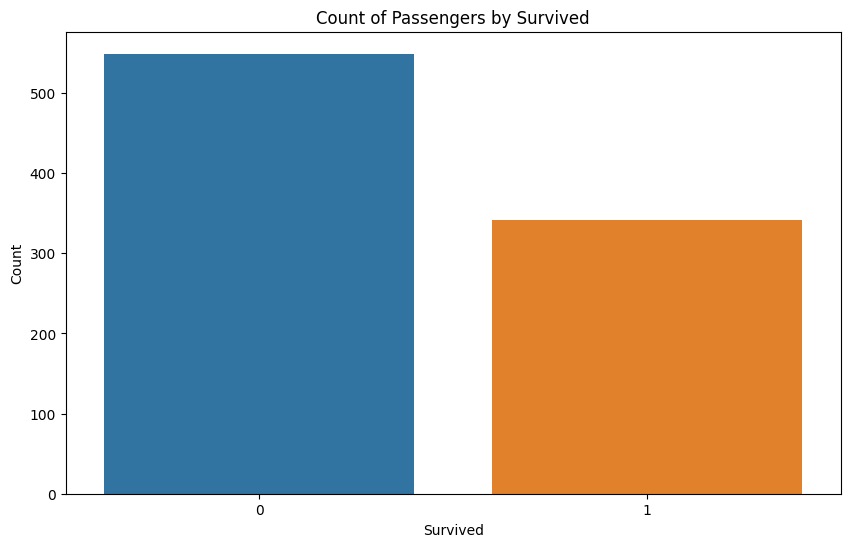

In [ ]:
# Count plot for Survived
if 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x='Survived', palette=['#1f77b4', '#ff7f0e'])
    plt.title('Count of Passengers by Survived')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.show()

<ipython-input-46-48496330c3cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='Pclass', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])


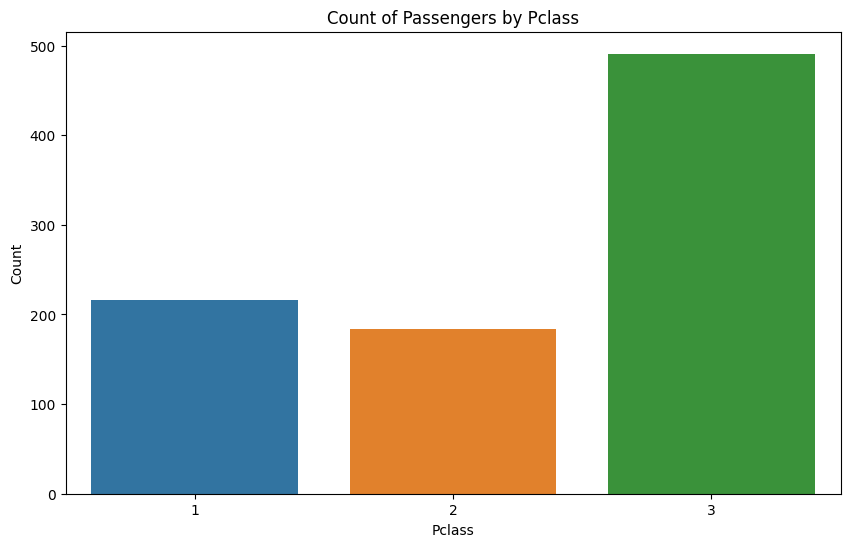

In [ ]:
# Count plot for Pclass
if 'Pclass' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train, x='Pclass', palette=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Count of Passengers by Pclass')
    plt.xlabel('Pclass')
    plt.ylabel('Count')
    plt.show()

In [ ]:
## Bivariate Analysis

<ipython-input-48-afe3946ac45a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='Pclass', y='Survived',  palette= ['#FF9999', '#66B2FF', '#99FF99'])


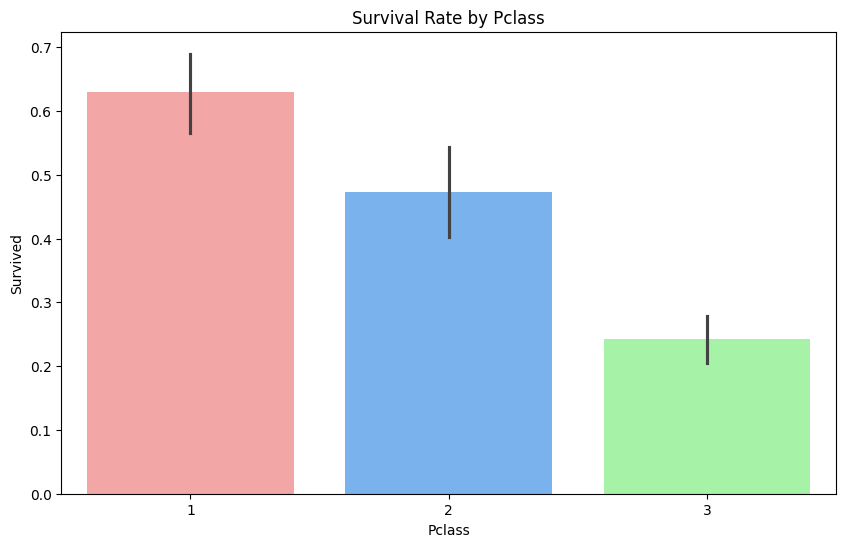

In [ ]:
# Survival rate by Pclass
if 'Pclass' in train.columns and 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=train, x='Pclass', y='Survived',  palette= ['#FF9999', '#66B2FF', '#99FF99'])
    plt.title('Survival Rate by Pclass')
    plt.show()

<ipython-input-49-1218c17ec1ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='Sex', y='Survived', palette= ['#FF9999', '#66B2FF'])


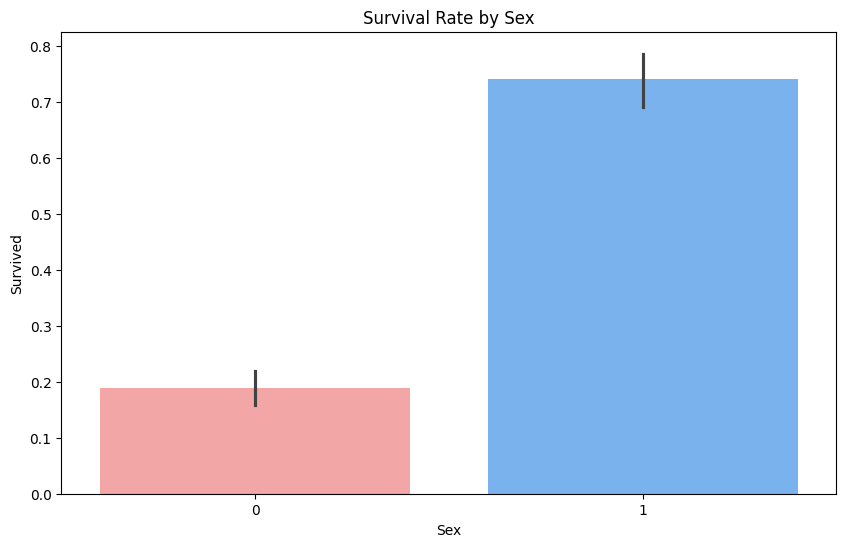

In [ ]:
# Survival rate by Sex
if 'Sex' in train.columns and 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=train, x='Sex', y='Survived', palette= ['#FF9999', '#66B2FF'])
    plt.title('Survival Rate by Sex')
    plt.show()

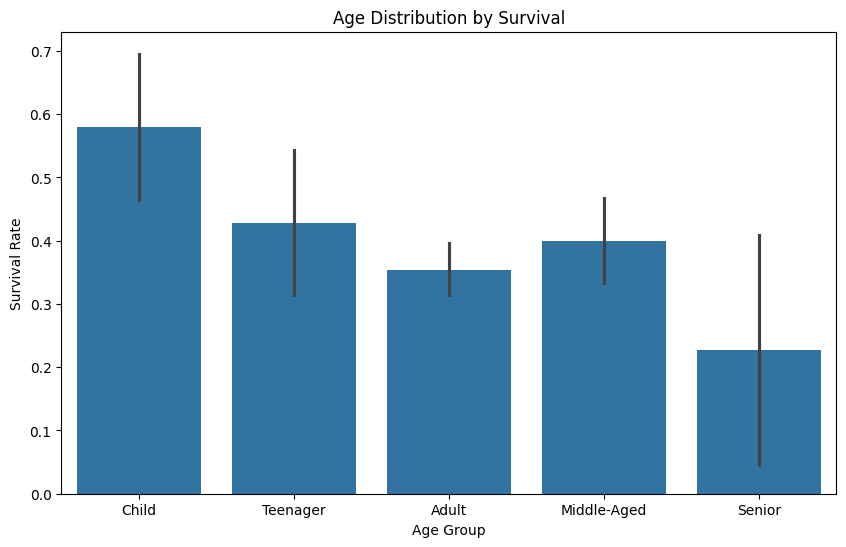

In [ ]:
# Create age groups
age_bins = [0, 12, 18, 35, 60, 120]
age_labels = ['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
train['AgeGroup'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)

# Plot age distribution by survival using age groups
if 'AgeGroup' in train.columns and 'Survived' in train.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=train, x='AgeGroup', y='Survived')
    plt.title('Age Distribution by Survival')
    plt.xlabel('Age Group')
    plt.ylabel('Survival Rate')
    plt.show()

In [ ]:
## Multivariate Analysis

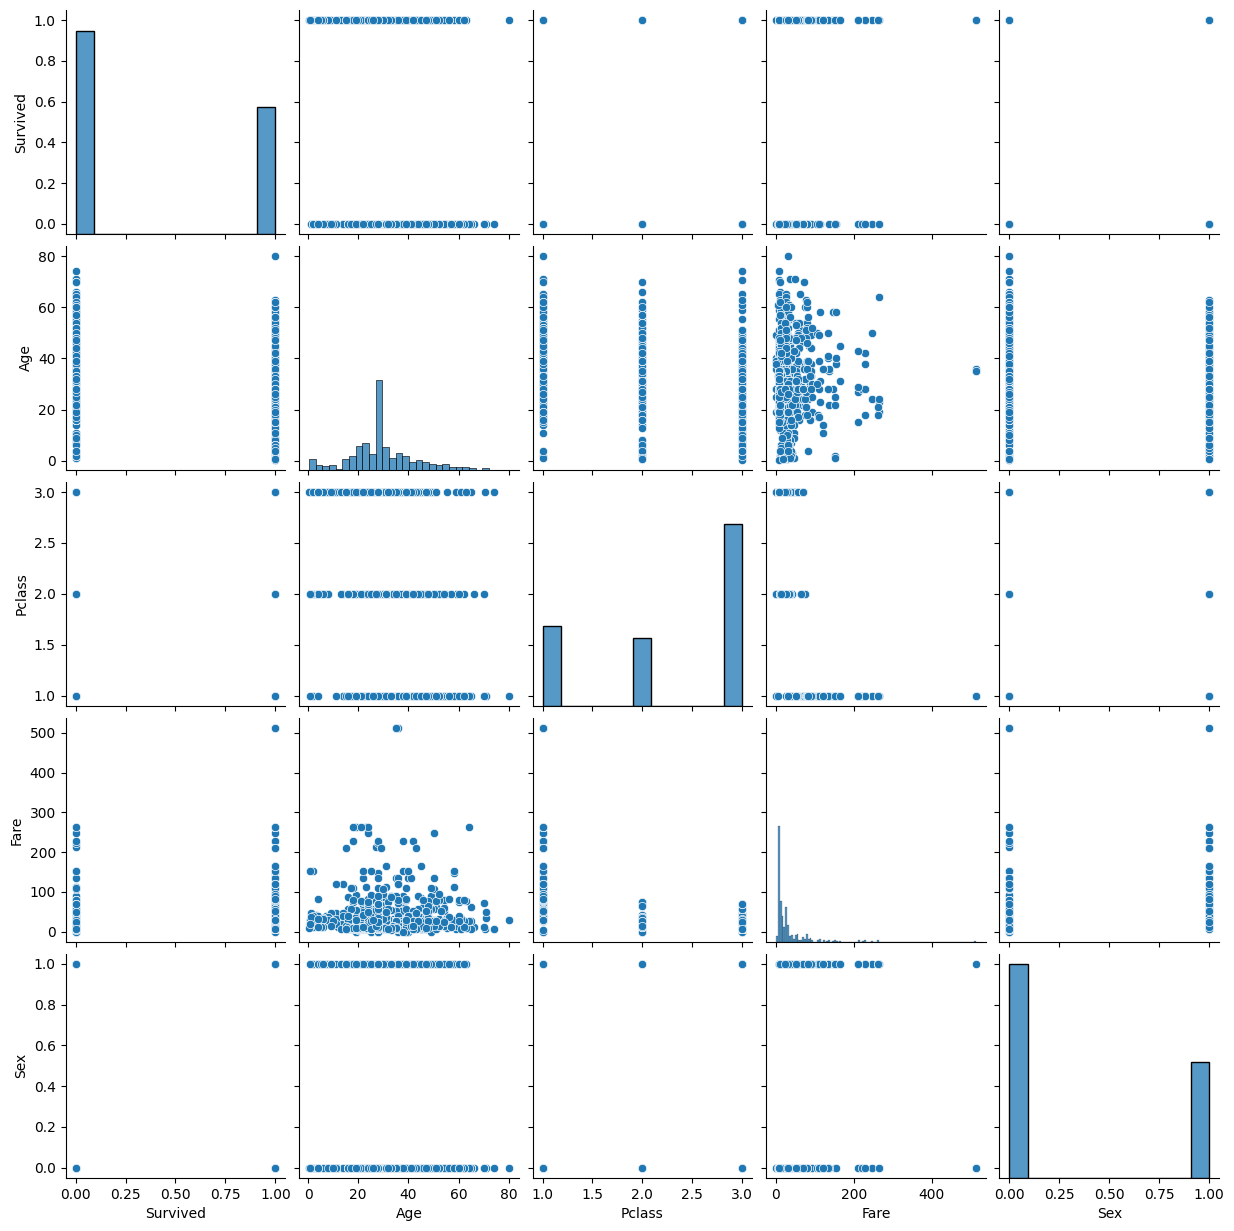

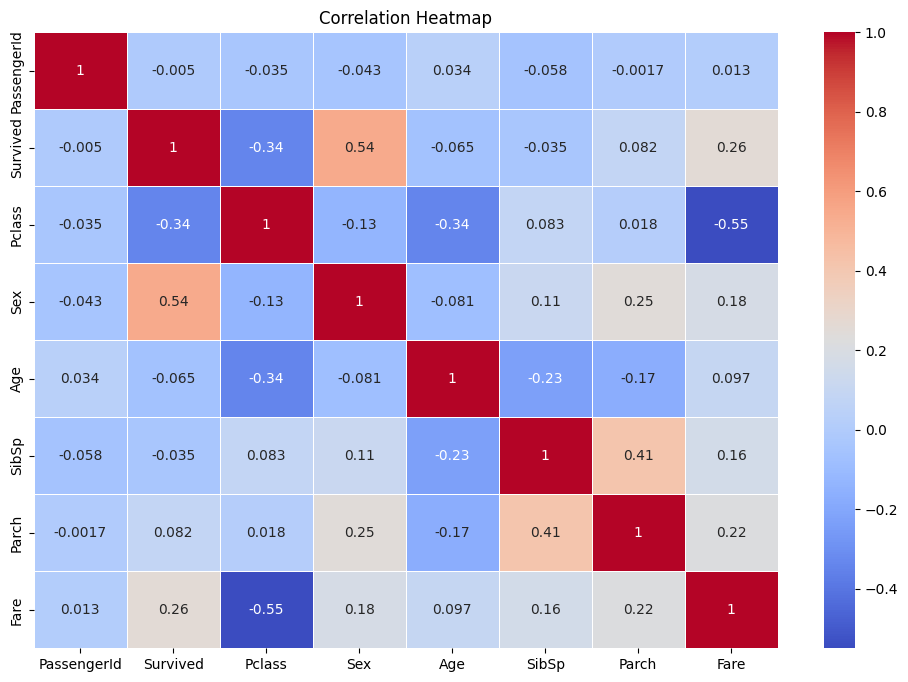

In [ ]:
# Pairplot for selected features
selected_features = ['Survived', 'Age', 'Pclass', 'Fare', 'Sex']
available_features = [feature for feature in selected_features if feature in train.columns]

if len(available_features) > 1:
    sns.pairplot(train[available_features])
    plt.show()

# Select only numerical columns for correlation
numerical_train = train.select_dtypes(include=['number'])  # Select numerical columns

# Heatmap of correlations for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_train.corr(), annot=True, cmap='coolwarm', linewidths=0.5)  # Use numerical_train
plt.title('Correlation Heatmap')
plt.show()